<a href="https://colab.research.google.com/github/whispermy/novatus_academia/blob/main/Week5_PART_II_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor

# 유류 데이터 분석

### 데이터 불러오기 및 살펴보기

In [116]:
# data\실습2\Experiment_data.csv
# data\실습2\Operation_data.csv
# 위 두 파일을 불러온다. 

operation_df = pd.read_csv('Operation_data.csv')
experiment_df = pd.read_csv('Experiment_data.csv')

In [117]:
operation_df

,Date,Type1,Type2,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9
0,2000.3.26 0:50,NaN,1.0,6.384935,-17.597283,126.139500,99.006433,2100.256667,1.825485,3.585908,75.112783,58.011433,1900.391667,112.691167,3.779405,5.499857,56.771183,329.225333,224.041500,229.345000,244.863167,155.468333,265.675000,218.703500,319.591667,230.991833,159.939833,289.968833,66.381717
1,2000.3.26 1:00,NaN,1.0,6.388888,-17.546900,125.810833,99.022333,2099.316667,1.856850,3.623527,75.014050,57.974217,1901.008333,115.080833,4.003845,5.499817,56.943517,329.352667,224.041667,229.353167,244.953333,155.618000,265.674833,218.712333,319.862000,231.241333,160.100500,290.134000,65.923667
2,2000.3.26 1:10,NaN,1.0,6.395512,-17.547650,126.215833,99.003983,2098.791667,1.862860,3.660752,74.984083,57.970200,1900.398333,113.879500,4.133448,5.499187,56.877367,329.302500,224.029333,229.501667,244.895833,155.609667,265.683333,218.692667,319.883833,231.166000,159.940167,290.165500,65.799633
3,2000.3.26 1:20,NaN,1.0,6.392380,-17.825817,126.073000,99.033817,2096.446667,1.849308,3.637462,74.680800,57.986400,1901.633333,112.614833,4.169767,5.499410,56.943750,329.348500,224.012500,229.510000,244.764500,155.617833,265.601833,218.689833,319.771667,231.098000,159.921667,290.067167,65.559183
4,2000.3.26 1:30,NaN,1.0,6.395648,-17.918117,125.893333,99.022983,2100.860000,1.852445,3.659075,74.639733,58.001150,1900.806667,113.773000,4.131440,5.500447,57.013917,329.341333,224.032333,229.477000,244.764667,155.651333,265.569167,218.682500,319.865167,231.098833,160.245500,290.066667,65.136600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,2000.6.12 11:50,1.0,NaN,4.204778,-18.199983,107.148500,99.151133,2099.836667,1.095853,1.788235,81.104833,62.012017,1799.553333,100.884833,2.366340,5.498260,60.173550,322.588833,220.749000,222.866667,231.523167,154.233333,259.278167,216.348667,312.884667,224.725000,160.058000,286.960000,65.203400
11299,2000.6.12 12:00,1.0,NaN,4.198670,-18.217950,107.084333,98.995800,2098.990000,1.087830,1.807267,80.567550,61.958867,1799.776667,101.281833,2.362245,5.500262,60.322750,322.761500,220.814500,222.808833,231.498333,154.391000,258.943333,216.389833,311.100333,224.711500,160.034333,286.894500,64.649800
11300,2000.6.12 12:10,1.0,NaN,4.202016,-18.384733,107.368500,98.970667,2099.786667,1.123667,1.880232,81.129217,62.048517,1798.876667,101.042167,2.600952,5.499225,60.021083,322.571000,220.842500,222.709500,231.457000,154.291500,259.278167,216.401667,310.085333,224.577000,160.235333,287.133333,65.726917
11301,2000.6.12 12:20,1.0,NaN,4.206825,-18.490767,107.502500,98.966467,2100.730000,1.181703,1.980832,80.757750,62.002450,1801.558333,100.495333,2.555725,5.500262,60.148150,322.107667,220.841500,222.543833,231.391000,154.490333,259.106667,216.396667,310.502667,224.481500,160.218000,287.347833,65.061217


In [118]:
experiment_df

,Date,Feed1,Feed2,Feed3,Feed4,Feed5,Target
0,2000.3.26 0:50,6.680537,1.025054,48.043242,5.174655,141.044903,6.381545
1,2000.3.26 1:00,6.636199,1.039032,48.043182,5.163185,141.077393,6.387333
2,2000.3.26 1:10,6.660788,1.020381,48.032768,5.142172,141.007954,6.390448
3,2000.3.26 1:20,6.637768,1.065137,48.023182,5.118452,141.074440,6.386780
4,2000.3.26 1:30,6.716983,1.015495,48.002835,5.182116,141.069312,6.387000
...,...,...,...,...,...,...,...
11298,2000.6.12 11:50,4.346798,1.097442,33.083042,4.653916,129.078927,4.200115
11299,2000.6.12 12:00,4.320761,1.050641,33.035193,4.675291,129.007904,4.197443
11300,2000.6.12 12:10,4.316061,1.069433,33.068136,4.620553,129.092322,4.200003
11301,2000.6.12 12:20,4.306356,1.063270,33.097545,4.639951,129.019194,4.198555


In [119]:
operation_df.columns

Index(['Date', 'Type1', 'Type2', 'Analyzer1', 'Analyzer2', 'Flow', 'Stage2_3',
       'Stage3_1', 'Stage3_2', 'Stage3_3', 'Stage4_1', 'Stage4_2', 'Stage4_3',
       'Stage4_4', 'Stage4_5', 'Stage3_4', 'Stage4_6', 'Stage1_1', 'Stage2_1',
       'Stage3_5', 'Stage3_6', 'Stage4_7', 'Stage4_8', 'Stage2_2', 'Stage1_2',
       'Stage3_9', 'Stage3_7', 'Stage3_8', 'Stage4_9'],
      dtype='object')

In [120]:
experiment_df.columns

Index(['Date', 'Feed1', 'Feed2', 'Feed3', 'Feed4', 'Feed5', 'Target'], dtype='object')

### 데이터 합치기

In [121]:
# pandas 의 merge를 이용하여 데이터를 합친다. 
All_df = pd.merge(operation_df,experiment_df, on='Date')
All_df

,Date,Type1,Type2,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target
0,2000.3.26 0:50,NaN,1.0,6.384935,-17.597283,126.139500,99.006433,2100.256667,1.825485,3.585908,75.112783,58.011433,1900.391667,112.691167,3.779405,5.499857,56.771183,329.225333,224.041500,229.345000,244.863167,155.468333,265.675000,218.703500,319.591667,230.991833,159.939833,289.968833,66.381717,6.680537,1.025054,48.043242,5.174655,141.044903,6.381545
1,2000.3.26 1:00,NaN,1.0,6.388888,-17.546900,125.810833,99.022333,2099.316667,1.856850,3.623527,75.014050,57.974217,1901.008333,115.080833,4.003845,5.499817,56.943517,329.352667,224.041667,229.353167,244.953333,155.618000,265.674833,218.712333,319.862000,231.241333,160.100500,290.134000,65.923667,6.636199,1.039032,48.043182,5.163185,141.077393,6.387333
2,2000.3.26 1:10,NaN,1.0,6.395512,-17.547650,126.215833,99.003983,2098.791667,1.862860,3.660752,74.984083,57.970200,1900.398333,113.879500,4.133448,5.499187,56.877367,329.302500,224.029333,229.501667,244.895833,155.609667,265.683333,218.692667,319.883833,231.166000,159.940167,290.165500,65.799633,6.660788,1.020381,48.032768,5.142172,141.007954,6.390448
3,2000.3.26 1:20,NaN,1.0,6.392380,-17.825817,126.073000,99.033817,2096.446667,1.849308,3.637462,74.680800,57.986400,1901.633333,112.614833,4.169767,5.499410,56.943750,329.348500,224.012500,229.510000,244.764500,155.617833,265.601833,218.689833,319.771667,231.098000,159.921667,290.067167,65.559183,6.637768,1.065137,48.023182,5.118452,141.074440,6.386780
4,2000.3.26 1:30,NaN,1.0,6.395648,-17.918117,125.893333,99.022983,2100.860000,1.852445,3.659075,74.639733,58.001150,1900.806667,113.773000,4.131440,5.500447,57.013917,329.341333,224.032333,229.477000,244.764667,155.651333,265.569167,218.682500,319.865167,231.098833,160.245500,290.066667,65.136600,6.716983,1.015495,48.002835,5.182116,141.069312,6.387000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,2000.6.12 11:50,1.0,NaN,4.204778,-18.199983,107.148500,99.151133,2099.836667,1.095853,1.788235,81.104833,62.012017,1799.553333,100.884833,2.366340,5.498260,60.173550,322.588833,220.749000,222.866667,231.523167,154.233333,259.278167,216.348667,312.884667,224.725000,160.058000,286.960000,65.203400,4.346798,1.097442,33.083042,4.653916,129.078927,4.200115
11299,2000.6.12 12:00,1.0,NaN,4.198670,-18.217950,107.084333,98.995800,2098.990000,1.087830,1.807267,80.567550,61.958867,1799.776667,101.281833,2.362245,5.500262,60.322750,322.761500,220.814500,222.808833,231.498333,154.391000,258.943333,216.389833,311.100333,224.711500,160.034333,286.894500,64.649800,4.320761,1.050641,33.035193,4.675291,129.007904,4.197443
11300,2000.6.12 12:10,1.0,NaN,4.202016,-18.384733,107.368500,98.970667,2099.786667,1.123667,1.880232,81.129217,62.048517,1798.876667,101.042167,2.600952,5.499225,60.021083,322.571000,220.842500,222.709500,231.457000,154.291500,259.278167,216.401667,310.085333,224.577000,160.235333,287.133333,65.726917,4.316061,1.069433,33.068136,4.620553,129.092322,4.200003
11301,2000.6.12 12:20,1.0,NaN,4.206825,-18.490767,107.502500,98.966467,2100.730000,1.181703,1.980832,80.757750,62.002450,1801.558333,100.495333,2.555725,5.500262,60.148150,322.107667,220.841500,222.543833,231.391000,154.490333,259.106667,216.396667,310.502667,224.481500,160.218000,287.347833,65.061217,4.306356,1.063270,33.097545,4.639951,129.019194,4.198555


### 그래프보기

Analyzer1


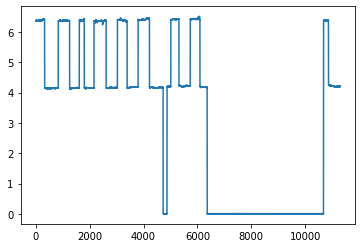

Analyzer2


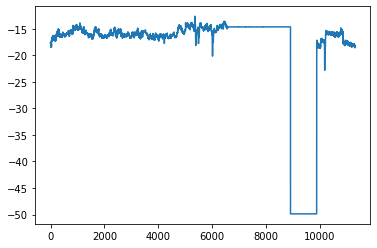

Flow


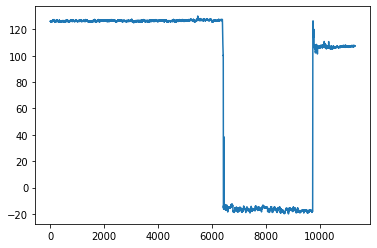

Stage2_3


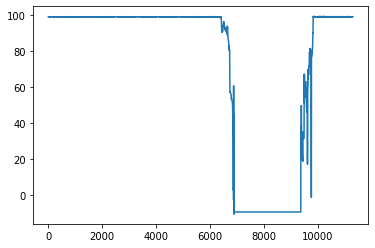

Stage3_1


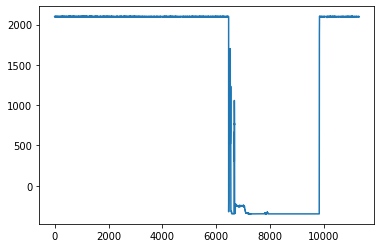

Stage3_2


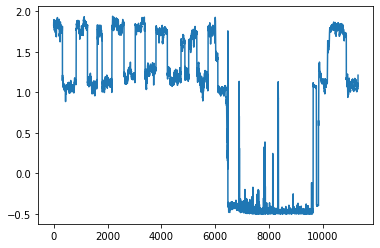

Stage3_3


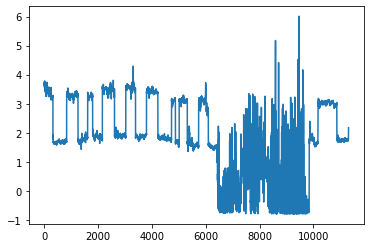

Stage4_1


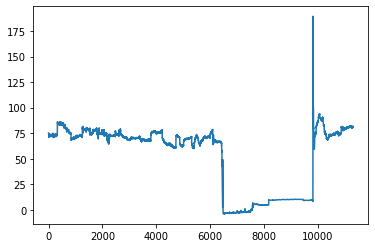

Stage4_2


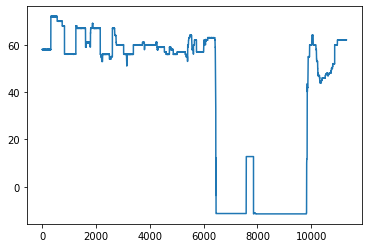

Stage4_3


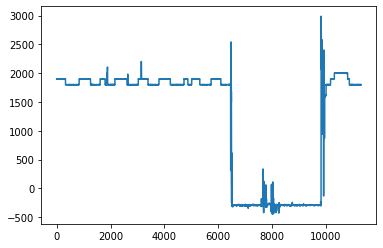

Stage4_4


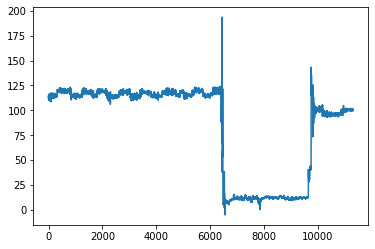

Stage4_5


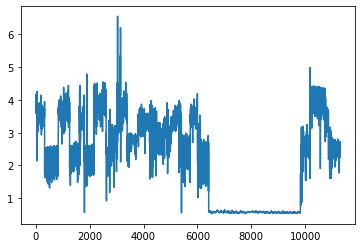

Stage3_4


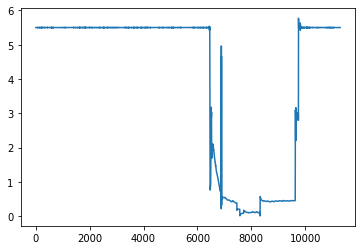

Stage4_6


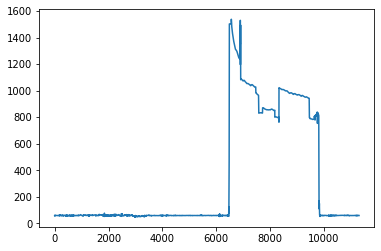

Stage1_1


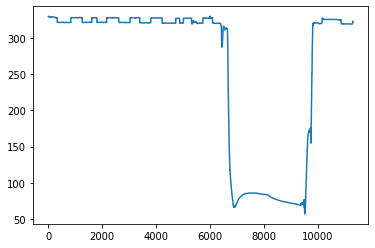

Stage2_1


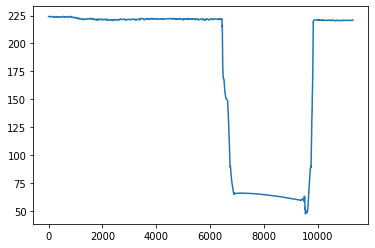

Stage3_5


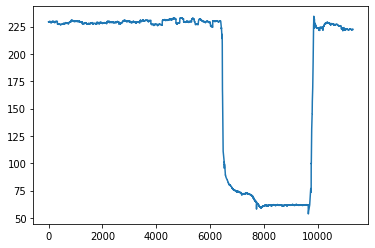

Stage3_6


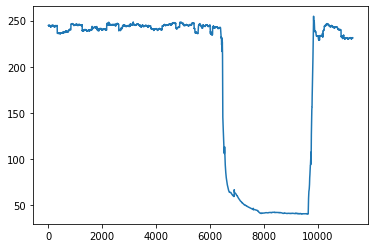

Stage4_7


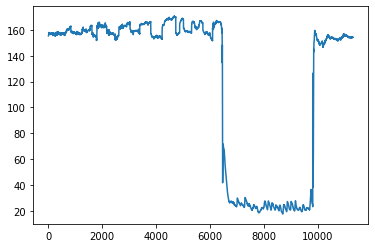

Stage4_8


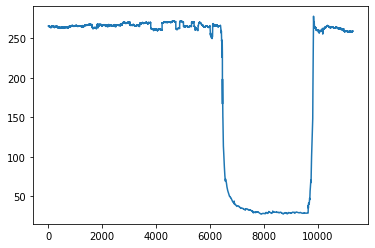

Stage2_2


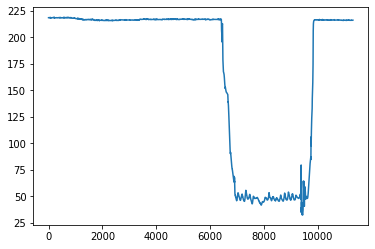

Stage1_2


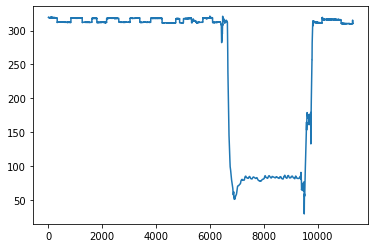

Stage3_9


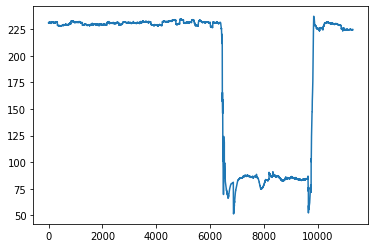

Stage3_7


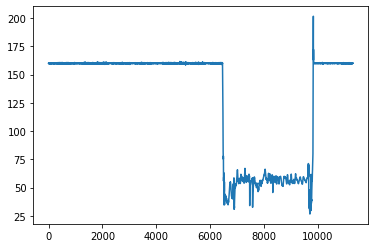

Stage3_8


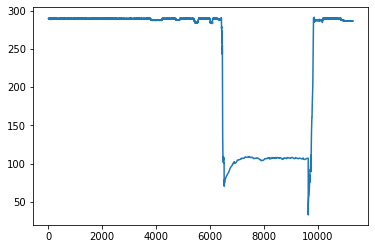

Stage4_9


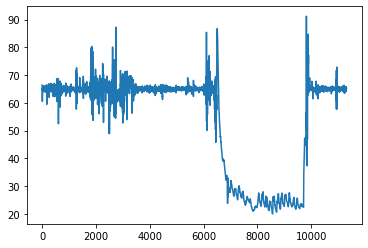

Feed1


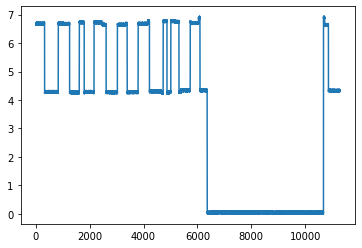

Feed2


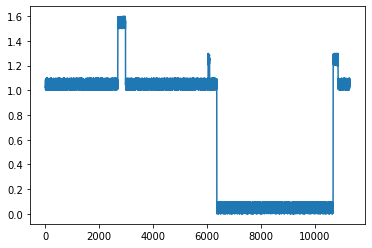

Feed3


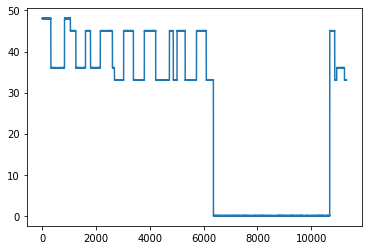

Feed4


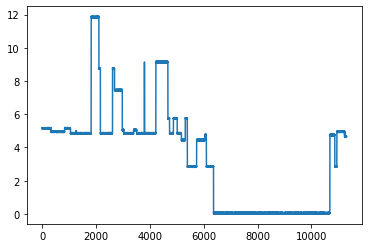

Feed5


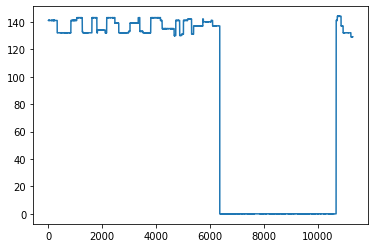

Target


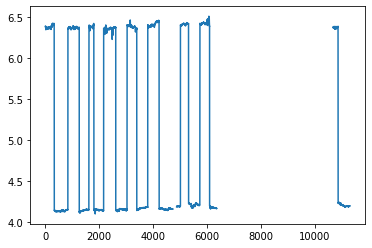

In [122]:
for i in All_df.columns[3:]:
  print(i)
  plt.plot(All_df.index, All_df[i])
  plt.show()

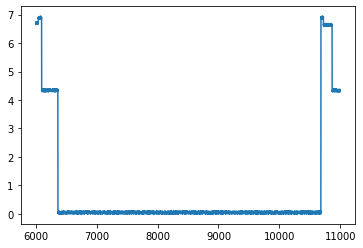

In [123]:
# 이상치 구간 데이터 그래프로 확인하기
plt.plot(All_df.index[6000:11000], All_df['Feed1'][6000:11000])

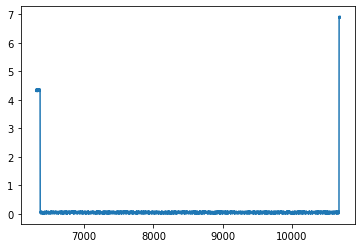

In [124]:
# 이상치 구간 데이터 그래프로 확인하기2
plt.plot(All_df.index[6300:10700], All_df['Feed1'][6300:10700])

In [125]:
# 확인된 이상치 구간 데이터 삭제하기
All_df = All_df.drop(All_df.index[6300:10700]).reset_index(drop=True)
All_df

,Date,Type1,Type2,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target
0,2000.3.26 0:50,NaN,1.0,6.384935,-17.597283,126.139500,99.006433,2100.256667,1.825485,3.585908,75.112783,58.011433,1900.391667,112.691167,3.779405,5.499857,56.771183,329.225333,224.041500,229.345000,244.863167,155.468333,265.675000,218.703500,319.591667,230.991833,159.939833,289.968833,66.381717,6.680537,1.025054,48.043242,5.174655,141.044903,6.381545
1,2000.3.26 1:00,NaN,1.0,6.388888,-17.546900,125.810833,99.022333,2099.316667,1.856850,3.623527,75.014050,57.974217,1901.008333,115.080833,4.003845,5.499817,56.943517,329.352667,224.041667,229.353167,244.953333,155.618000,265.674833,218.712333,319.862000,231.241333,160.100500,290.134000,65.923667,6.636199,1.039032,48.043182,5.163185,141.077393,6.387333
2,2000.3.26 1:10,NaN,1.0,6.395512,-17.547650,126.215833,99.003983,2098.791667,1.862860,3.660752,74.984083,57.970200,1900.398333,113.879500,4.133448,5.499187,56.877367,329.302500,224.029333,229.501667,244.895833,155.609667,265.683333,218.692667,319.883833,231.166000,159.940167,290.165500,65.799633,6.660788,1.020381,48.032768,5.142172,141.007954,6.390448
3,2000.3.26 1:20,NaN,1.0,6.392380,-17.825817,126.073000,99.033817,2096.446667,1.849308,3.637462,74.680800,57.986400,1901.633333,112.614833,4.169767,5.499410,56.943750,329.348500,224.012500,229.510000,244.764500,155.617833,265.601833,218.689833,319.771667,231.098000,159.921667,290.067167,65.559183,6.637768,1.065137,48.023182,5.118452,141.074440,6.386780
4,2000.3.26 1:30,NaN,1.0,6.395648,-17.918117,125.893333,99.022983,2100.860000,1.852445,3.659075,74.639733,58.001150,1900.806667,113.773000,4.131440,5.500447,57.013917,329.341333,224.032333,229.477000,244.764667,155.651333,265.569167,218.682500,319.865167,231.098833,160.245500,290.066667,65.136600,6.716983,1.015495,48.002835,5.182116,141.069312,6.387000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898,2000.6.12 11:50,1.0,NaN,4.204778,-18.199983,107.148500,99.151133,2099.836667,1.095853,1.788235,81.104833,62.012017,1799.553333,100.884833,2.366340,5.498260,60.173550,322.588833,220.749000,222.866667,231.523167,154.233333,259.278167,216.348667,312.884667,224.725000,160.058000,286.960000,65.203400,4.346798,1.097442,33.083042,4.653916,129.078927,4.200115
6899,2000.6.12 12:00,1.0,NaN,4.198670,-18.217950,107.084333,98.995800,2098.990000,1.087830,1.807267,80.567550,61.958867,1799.776667,101.281833,2.362245,5.500262,60.322750,322.761500,220.814500,222.808833,231.498333,154.391000,258.943333,216.389833,311.100333,224.711500,160.034333,286.894500,64.649800,4.320761,1.050641,33.035193,4.675291,129.007904,4.197443
6900,2000.6.12 12:10,1.0,NaN,4.202016,-18.384733,107.368500,98.970667,2099.786667,1.123667,1.880232,81.129217,62.048517,1798.876667,101.042167,2.600952,5.499225,60.021083,322.571000,220.842500,222.709500,231.457000,154.291500,259.278167,216.401667,310.085333,224.577000,160.235333,287.133333,65.726917,4.316061,1.069433,33.068136,4.620553,129.092322,4.200003
6901,2000.6.12 12:20,1.0,NaN,4.206825,-18.490767,107.502500,98.966467,2100.730000,1.181703,1.980832,80.757750,62.002450,1801.558333,100.495333,2.555725,5.500262,60.148150,322.107667,220.841500,222.543833,231.391000,154.490333,259.106667,216.396667,310.502667,224.481500,160.218000,287.347833,65.061217,4.306356,1.063270,33.097545,4.639951,129.019194,4.198555


### 데이터 구분짓기

In [126]:
Type1_df = All_df[All_df['Type1']==1].reset_index(drop=True)
Type2_df = All_df[All_df['Type2']==1].reset_index(drop=True)

In [127]:
Type1_df = Type1_df.drop(['Type1','Type2', 'Date'],axis=1)
Type2_df = Type2_df.drop(['Type1','Type2', 'Date'],axis=1)

In [128]:
Type1_df

,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target
0,4.159574,-16.394533,126.732333,99.055450,2100.371667,1.141542,1.760965,83.097883,71.549617,1799.551667,120.863333,1.753258,5.498780,60.637283,321.385833,223.611833,227.603333,237.272000,158.423500,264.624833,218.652500,312.908333,228.962000,160.356333,289.896500,66.452833,4.328484,1.003018,36.035333,4.971693,132.056875,4.153465
1,4.158990,-16.474600,126.389667,98.988033,2099.215000,1.167213,1.773257,83.547400,71.965450,1798.660000,120.096500,2.120675,5.499485,60.146883,321.350000,223.649333,227.702167,237.189667,158.448333,264.543500,218.614833,312.679333,228.936500,160.043500,290.488000,66.367583,4.255706,1.014821,36.026992,4.993027,132.009246,4.152240
2,4.158775,-16.014600,126.634667,98.999567,2102.105000,1.188357,1.785190,84.503200,72.081700,1799.698333,118.629833,2.294622,5.498518,59.821450,321.282667,223.675167,227.652833,236.836000,158.215500,263.973500,218.584167,312.574000,228.676000,160.204333,290.119667,66.314583,4.235189,1.007376,36.090852,4.994184,132.061037,4.153242
3,4.159667,-15.934750,126.539667,99.088733,2100.686667,1.177337,1.782323,84.917000,72.039683,1800.015000,119.394000,1.735740,5.502450,59.470950,321.137667,223.715333,227.553833,236.498500,158.041167,263.769833,218.628833,311.920000,228.518167,159.748500,289.325500,66.221083,4.283673,1.028394,36.068525,4.954880,132.044996,4.150127
4,4.148439,-15.934733,126.405167,98.998333,2098.556667,1.212110,1.918915,84.868083,71.945167,1798.625000,120.151167,1.904660,5.499707,59.011317,321.093500,223.706667,227.421667,236.342500,157.958000,264.169000,218.628000,312.766500,228.426833,159.971333,289.957667,67.013983,4.280470,1.083395,36.016502,4.952766,132.036920,4.144560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,4.204778,-18.199983,107.148500,99.151133,2099.836667,1.095853,1.788235,81.104833,62.012017,1799.553333,100.884833,2.366340,5.498260,60.173550,322.588833,220.749000,222.866667,231.523167,154.233333,259.278167,216.348667,312.884667,224.725000,160.058000,286.960000,65.203400,4.346798,1.097442,33.083042,4.653916,129.078927,4.200115
3760,4.198670,-18.217950,107.084333,98.995800,2098.990000,1.087830,1.807267,80.567550,61.958867,1799.776667,101.281833,2.362245,5.500262,60.322750,322.761500,220.814500,222.808833,231.498333,154.391000,258.943333,216.389833,311.100333,224.711500,160.034333,286.894500,64.649800,4.320761,1.050641,33.035193,4.675291,129.007904,4.197443
3761,4.202016,-18.384733,107.368500,98.970667,2099.786667,1.123667,1.880232,81.129217,62.048517,1798.876667,101.042167,2.600952,5.499225,60.021083,322.571000,220.842500,222.709500,231.457000,154.291500,259.278167,216.401667,310.085333,224.577000,160.235333,287.133333,65.726917,4.316061,1.069433,33.068136,4.620553,129.092322,4.200003
3762,4.206825,-18.490767,107.502500,98.966467,2100.730000,1.181703,1.980832,80.757750,62.002450,1801.558333,100.495333,2.555725,5.500262,60.148150,322.107667,220.841500,222.543833,231.391000,154.490333,259.106667,216.396667,310.502667,224.481500,160.218000,287.347833,65.061217,4.306356,1.063270,33.097545,4.639951,129.019194,4.198555


### Timelag적용

In [129]:
Feed_columns = ['Feed1', 'Feed2', 'Feed3', 'Feed4', 'Feed5']
Stage1_columns = ['Stage1_1','Stage1_2']
Stage2_columns = ['Stage2_1','Stage2_2', 'Stage2_3']
Stage3_columns = ['Stage3_1', 'Stage3_2', 'Stage3_3','Stage3_4','Stage3_5', 'Stage3_6','Stage3_7', 'Stage3_8','Stage3_9']
Stage4_columns = ['Stage4_1', 'Stage4_2','Stage4_3', 'Stage4_4', 'Stage4_5', 'Stage4_6','Stage4_7', 'Stage4_8', 'Stage4_9','Analyzer1', 'Analyzer2']
Usage_columns = Feed_columns + Stage1_columns + Stage2_columns + Stage3_columns + Stage4_columns
Target_columns = ['Target']

In [130]:
# flow 데이터를 category를 부여하여 category별 time-lag를 조절한다. 
Type1_df['Category'] = np.nan

### Timelag 정답 (열지 않고 위에 문제 풀어주세요!)

In [131]:
# flow 값에 따라 category 분류하기
for i in Type1_df.index:

  if Type1_df.loc[i, 'Flow'] <= 114:
    Type1_df.loc[i, 'Category'] = 1

  elif (Type1_df.loc[i, 'Flow'] > 114) & (Type1_df.loc[i, 'Flow'] <= 124):
    Type1_df.loc[i, 'Category'] = 2

  elif (Type1_df.loc[i, 'Flow'] > 124) & (Type1_df.loc[i, 'Flow'] <= 134):
    Type1_df.loc[i, 'Category'] = 3
  
  elif (Type1_df.loc[i, 'Flow'] > 134) & (Type1_df.loc[i, 'Flow'] <= 145):
    Type1_df.loc[i, 'Category'] = 4
  
  elif (Type1_df.loc[i, 'Flow'] > 145) & (Type1_df.loc[i, 'Flow'] <= 154):
    Type1_df.loc[i, 'Category'] = 5

  elif (Type1_df.loc[i, 'Flow'] > 154) & (Type1_df.loc[i, 'Flow'] <= 169):
    Type1_df.loc[i, 'Category'] = 6

  elif (Type1_df.loc[i, 'Flow'] > 170) & (Type1_df.loc[i, 'Flow'] <= 179):
    Type1_df.loc[i, 'Category'] = 7

  elif (Type1_df.loc[i, 'Flow'] > 180) & (Type1_df.loc[i, 'Flow'] <= 194):
    Type1_df.loc[i, 'Category'] = 8

  else:
    Type1_df.loc[i, 'Category'] = 9

In [132]:
Type1_df

,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target,Category
0,4.159574,-16.394533,126.732333,99.055450,2100.371667,1.141542,1.760965,83.097883,71.549617,1799.551667,120.863333,1.753258,5.498780,60.637283,321.385833,223.611833,227.603333,237.272000,158.423500,264.624833,218.652500,312.908333,228.962000,160.356333,289.896500,66.452833,4.328484,1.003018,36.035333,4.971693,132.056875,4.153465,3.0
1,4.158990,-16.474600,126.389667,98.988033,2099.215000,1.167213,1.773257,83.547400,71.965450,1798.660000,120.096500,2.120675,5.499485,60.146883,321.350000,223.649333,227.702167,237.189667,158.448333,264.543500,218.614833,312.679333,228.936500,160.043500,290.488000,66.367583,4.255706,1.014821,36.026992,4.993027,132.009246,4.152240,3.0
2,4.158775,-16.014600,126.634667,98.999567,2102.105000,1.188357,1.785190,84.503200,72.081700,1799.698333,118.629833,2.294622,5.498518,59.821450,321.282667,223.675167,227.652833,236.836000,158.215500,263.973500,218.584167,312.574000,228.676000,160.204333,290.119667,66.314583,4.235189,1.007376,36.090852,4.994184,132.061037,4.153242,3.0
3,4.159667,-15.934750,126.539667,99.088733,2100.686667,1.177337,1.782323,84.917000,72.039683,1800.015000,119.394000,1.735740,5.502450,59.470950,321.137667,223.715333,227.553833,236.498500,158.041167,263.769833,218.628833,311.920000,228.518167,159.748500,289.325500,66.221083,4.283673,1.028394,36.068525,4.954880,132.044996,4.150127,3.0
4,4.148439,-15.934733,126.405167,98.998333,2098.556667,1.212110,1.918915,84.868083,71.945167,1798.625000,120.151167,1.904660,5.499707,59.011317,321.093500,223.706667,227.421667,236.342500,157.958000,264.169000,218.628000,312.766500,228.426833,159.971333,289.957667,67.013983,4.280470,1.083395,36.016502,4.952766,132.036920,4.144560,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,4.204778,-18.199983,107.148500,99.151133,2099.836667,1.095853,1.788235,81.104833,62.012017,1799.553333,100.884833,2.366340,5.498260,60.173550,322.588833,220.749000,222.866667,231.523167,154.233333,259.278167,216.348667,312.884667,224.725000,160.058000,286.960000,65.203400,4.346798,1.097442,33.083042,4.653916,129.078927,4.200115,1.0
3760,4.198670,-18.217950,107.084333,98.995800,2098.990000,1.087830,1.807267,80.567550,61.958867,1799.776667,101.281833,2.362245,5.500262,60.322750,322.761500,220.814500,222.808833,231.498333,154.391000,258.943333,216.389833,311.100333,224.711500,160.034333,286.894500,64.649800,4.320761,1.050641,33.035193,4.675291,129.007904,4.197443,1.0
3761,4.202016,-18.384733,107.368500,98.970667,2099.786667,1.123667,1.880232,81.129217,62.048517,1798.876667,101.042167,2.600952,5.499225,60.021083,322.571000,220.842500,222.709500,231.457000,154.291500,259.278167,216.401667,310.085333,224.577000,160.235333,287.133333,65.726917,4.316061,1.069433,33.068136,4.620553,129.092322,4.200003,1.0
3762,4.206825,-18.490767,107.502500,98.966467,2100.730000,1.181703,1.980832,80.757750,62.002450,1801.558333,100.495333,2.555725,5.500262,60.148150,322.107667,220.841500,222.543833,231.391000,154.490333,259.106667,216.396667,310.502667,224.481500,160.218000,287.347833,65.061217,4.306356,1.063270,33.097545,4.639951,129.019194,4.198555,1.0


In [133]:
# Type1_df 와 동일한 shape를 가지는 빈 데이터 프레임 만들기
Type1_df_timelag = pd.DataFrame(index= Type1_df.index, columns=Type1_df.columns)
Type1_df_timelag

,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target,Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# time lag가 필요하지 않은 데이터들은 보존하기
Type1_df_timelag[['Feed1','Feed2','Feed3','Feed4','Feed5','Flow','Category']] = Type1_df[['Feed1','Feed2','Feed3','Feed4','Feed5','Flow','Category']]
Type1_df_timelag

,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target,Category
0,NaN,NaN,126.732333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.328484,1.003018,36.035333,4.971693,132.056875,NaN,3.0
1,NaN,NaN,126.389667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.255706,1.014821,36.026992,4.993027,132.009246,NaN,3.0
2,NaN,NaN,126.634667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.235189,1.007376,36.090852,4.994184,132.061037,NaN,3.0
3,NaN,NaN,126.539667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.283673,1.028394,36.068525,4.954880,132.044996,NaN,3.0
4,NaN,NaN,126.405167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.280470,1.083395,36.016502,4.952766,132.036920,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,NaN,NaN,107.148500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.346798,1.097442,33.083042,4.653916,129.078927,NaN,1.0
3760,NaN,NaN,107.084333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.320761,1.050641,33.035193,4.675291,129.007904,NaN,1.0
3761,NaN,NaN,107.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.316061,1.069433,33.068136,4.620553,129.092322,NaN,1.0
3762,NaN,NaN,107.502500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.306356,1.063270,33.097545,4.639951,129.019194,NaN,1.0


In [102]:
for i in Type1_df_timelag.index:

  if Type1_df_timelag.loc[i, 'Category'] == 1:
    if i+14 > Type1_df.index[-1]:
      # i+14 의 데이터가 존재 하지 않는 경우에 대해서 예외처리 코드를 추가한다.
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+5, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+8, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+11, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+14, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+14, Target_columns]


  elif Type1_df_timelag.loc[i, 'Category'] == 2:
    if i+13 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+5, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+8, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+11, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+13, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+13, Target_columns]

  elif Type1_df_timelag.loc[i, 'Category'] == 3:
    if i+13 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+4, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+7, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+10, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+13, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+13, Target_columns]


  elif Type1_df_timelag.loc[i, 'Category'] == 4:
    if i+12 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+4, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+7, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+9, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+12, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+12, Target_columns]

  elif Type1_df_timelag.loc[i, 'Category'] == 5:
    if i+12 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+4, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+6, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+8, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+12, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+12, Target_columns]
      

  elif Type1_df_timelag.loc[i, 'Category'] == 6:
    if i+11 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+3, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+6, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+8, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+11, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+11, Target_columns]
      
  elif Type1_df_timelag.loc[i, 'Category'] == 7:
    if i+11 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+3, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+5, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+8, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+11, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+11, Target_columns]
      
  elif Type1_df_timelag.loc[i, 'Category'] == 8:
    if i+10 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+3, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+5, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+7, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+10, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+10, Target_columns]
      
  elif Type1_df_timelag.loc[i, 'Category'] == 9:
    if i+9 > Type1_df.index[-1]:
      continue
    else:
      Type1_df_timelag.loc[i, Stage1_columns] = Type1_df.loc[i+2, Stage1_columns]
      Type1_df_timelag.loc[i, Stage2_columns] = Type1_df.loc[i+5, Stage2_columns]
      Type1_df_timelag.loc[i, Stage3_columns] = Type1_df.loc[i+7, Stage3_columns]
      Type1_df_timelag.loc[i, Stage4_columns] = Type1_df.loc[i+9, Stage4_columns]
      Type1_df_timelag.loc[i, Target_columns] = Type1_df.loc[i+9, Target_columns]

In [135]:
def timelag(df, timelag_df, idx, stage1, stage2, stage3, stage4, Stage1_columns, Stage2_columns, Stage3_columns, Stage4_columns, Target_columns):
  if idx + stage4 > df.index[-1]:
    return timelag_df
  else:
    timelag_df.loc[idx, Stage1_columns] = df.loc[idx+stage1, Stage1_columns]
    timelag_df.loc[idx, Stage2_columns] = df.loc[idx+stage2, Stage2_columns]
    timelag_df.loc[idx, Stage3_columns] = df.loc[idx+stage3, Stage3_columns]
    timelag_df.loc[idx, Stage4_columns] = df.loc[idx+stage4, Stage4_columns]
    timelag_df.loc[idx, Target_columns] = df.loc[idx+stage4, Target_columns]

  return timelag_df

for i in Type1_df_timelag.index:

  if Type1_df_timelag.loc[i, 'Category'] == 1:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 5, 8, 11, 14, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 2:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 5, 8, 11, 13, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 3:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 4, 7, 10, 13, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 4:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 4, 7, 9, 12, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 5:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 4, 6, 8, 12, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 6:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 3, 6, 8, 11, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 7:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 3, 5, 8, 11, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 8:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 3, 5, 7, 10, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

  elif Type1_df_timelag.loc[i, 'Category'] == 9:
    Type1_df_timelag = timelag(Type1_df, Type1_df_timelag, i, 2, 5, 7, 9, Stage1_columns,  Stage2_columns, Stage3_columns, Stage4_columns, Target_columns)

### 최종 분석

In [136]:
Type1_df_timelag

,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target,Category
0,4.14822,-16.4255,126.732333,99.0148,2100.66,1.18024,1.68728,84.7853,71.9704,1798.28,120.07,2.3243,5.49919,58.8367,321.094,223.742,227.273,236.219,157.477,263.9,218.612,312.767,228.45,160.021,290.072,64.6434,4.328484,1.003018,36.035333,4.971693,132.056875,4.14646,3.0
1,4.15008,-16.4355,126.389667,99.0092,2099.78,1.15542,1.67373,84.9935,72.0487,1799.25,119.283,1.63604,5.50004,58.7729,321.034,223.714,227.364,236.309,157.468,264.177,218.612,312.557,228.482,160.065,289.992,65.1412,4.255706,1.014821,36.026992,4.993027,132.009246,4.14579,3.0
2,4.14789,-16.4725,126.634667,99.0128,2099.88,1.16376,1.6635,84.8807,71.9951,1800.33,119.75,2.26262,5.49963,58.9665,320.984,223.744,227.405,236.334,157.709,263.884,218.61,312.534,228.557,160.374,290.103,65.0434,4.235189,1.007376,36.090852,4.994184,132.061037,4.14367,3.0
3,4.14585,-16.509,126.539667,99.0772,2100.06,1.15377,1.66998,85.0009,71.9963,1800.02,119.442,2.45895,5.49922,58.9418,320.95,223.701,227.422,236.35,157.526,263.925,218.593,312.604,228.619,159.993,290.001,64.5084,4.283673,1.028394,36.068525,4.954880,132.044996,4.144,3.0
4,4.14608,-16.5791,126.405167,98.9892,2099.89,1.17733,1.66095,85.0973,71.9952,1799.06,118.352,1.90136,5.49952,59.0608,320.962,223.746,227.463,236.326,157.56,263.957,218.621,312.601,228.546,159.858,289.976,64.9017,4.280470,1.083395,36.016502,4.952766,132.036920,4.14367,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,NaN,NaN,107.148500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.346798,1.097442,33.083042,4.653916,129.078927,NaN,1.0
3760,NaN,NaN,107.084333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.320761,1.050641,33.035193,4.675291,129.007904,NaN,1.0
3761,NaN,NaN,107.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.316061,1.069433,33.068136,4.620553,129.092322,NaN,1.0
3762,NaN,NaN,107.502500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.306356,1.063270,33.097545,4.639951,129.019194,NaN,1.0


In [137]:
# timelag 를 조정하면서 index가 벗어나느 경우 (over i+14)에 0값이 생겼으므로 해당 데이터 삭제
# Type1_df_timelag = Type1_df_timelag.dropna().reset_index(drop=True)
Type1_df_timelag = Type1_df_timelag.dropna().reset_index(drop=True)

# 변수 타입을 float 64로 변경하기
Type1_df_timelag = Type1_df_timelag.astype('float64')

In [138]:
# 데이터를 Train / Validation / Test set으로 나누기
Train_df = Type1_df_timelag.loc[:int(len(Type1_df_timelag)*0.8), :].reset_index(drop=True)
Vald_df = Type1_df_timelag.loc[int(len(Type1_df_timelag)*0.8):int(len(Type1_df_timelag)*0.9), :].reset_index(drop=True)
Test_df = Type1_df_timelag.loc[int(len(Type1_df_timelag)*0.9):, :].reset_index(drop=True)

In [139]:
# Random Forest Model 만들기
clf = RandomForestRegressor(max_depth = 10, random_state = 0)
clf.fit(Train_df[Usage_columns], Train_df[Target_columns])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [140]:
Train_df

,Analyzer1,Analyzer2,Flow,Stage2_3,Stage3_1,Stage3_2,Stage3_3,Stage4_1,Stage4_2,Stage4_3,Stage4_4,Stage4_5,Stage3_4,Stage4_6,Stage1_1,Stage2_1,Stage3_5,Stage3_6,Stage4_7,Stage4_8,Stage2_2,Stage1_2,Stage3_9,Stage3_7,Stage3_8,Stage4_9,Feed1,Feed2,Feed3,Feed4,Feed5,Target,Category
0,4.148224,-16.425467,126.732333,99.014817,2100.660000,1.180245,1.687282,84.785350,71.970450,1798.280000,120.069667,2.324298,5.499188,58.836700,321.093500,223.741667,227.273000,236.218667,157.476667,263.900000,218.611500,312.766500,228.450167,160.021000,290.071833,64.643417,4.328484,1.003018,36.035333,4.971693,132.056875,4.146455,3.0
1,4.150077,-16.435500,126.389667,99.009250,2099.778333,1.155418,1.673727,84.993467,72.048733,1799.253333,119.283167,1.636038,5.500038,58.772883,321.033833,223.713833,227.363667,236.309167,157.468167,264.177000,218.611500,312.557333,228.482333,160.065500,289.992333,65.141200,4.255706,1.014821,36.026992,4.993027,132.009246,4.145787,3.0
2,4.147891,-16.472533,126.634667,99.012800,2099.881667,1.163762,1.663500,84.880733,71.995150,1800.325000,119.749833,2.262615,5.499633,58.966533,320.983667,223.743500,227.405167,236.334000,157.709167,263.883667,218.610000,312.534000,228.557000,160.373833,290.103333,65.043383,4.235189,1.007376,36.090852,4.994184,132.061037,4.143672,3.0
3,4.145854,-16.509033,126.539667,99.077233,2100.060000,1.153767,1.669983,85.000900,71.996333,1800.023333,119.441500,2.458952,5.499223,58.941783,320.949667,223.701333,227.421667,236.350333,157.526500,263.924500,218.592500,312.604000,228.619167,159.993333,290.000667,64.508417,4.283673,1.028394,36.068525,4.954880,132.044996,4.144005,3.0
4,4.146076,-16.579117,126.405167,98.989167,2099.891667,1.177332,1.660953,85.097317,71.995217,1799.056667,118.352167,1.901360,5.499522,59.060767,320.961500,223.745667,227.463000,236.325667,157.559667,263.957000,218.621500,312.600667,228.546000,159.857833,289.976000,64.901733,4.280470,1.083395,36.016502,4.952766,132.036920,4.143668,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,4.231428,-14.704350,127.244333,98.934600,2100.133333,1.194042,1.598935,63.572633,58.038650,1801.563333,119.257167,2.601095,5.498855,59.304400,319.979000,221.640000,231.828167,245.962167,166.055667,270.066833,217.069833,312.289000,233.182167,159.681000,290.069833,64.970083,4.356745,1.067927,33.078548,2.841271,137.064242,4.227553,3.0
2997,4.232695,-14.698800,127.448500,99.031917,2099.951667,1.247125,1.605495,63.140817,56.611050,1800.803333,120.024833,2.387997,5.500523,59.206717,319.990833,221.677833,231.918667,246.027833,166.197833,270.278167,217.067500,312.302333,233.229333,160.271667,290.294000,65.027983,4.300742,1.072683,33.018619,2.805108,137.053762,4.227775,3.0
2998,4.232205,-14.656517,127.278000,99.002733,2101.436667,1.221515,1.599202,62.166733,56.059117,1801.070000,118.962833,2.948633,5.498668,59.654867,320.015000,221.684500,231.926667,245.970500,166.122667,270.741333,217.085333,312.264000,233.220167,159.759000,289.960833,62.322883,4.317290,1.020412,33.053812,2.883024,137.009158,4.225995,3.0
2999,4.234022,-14.687133,127.327000,99.031767,2099.075000,1.228132,1.587493,62.218750,58.441617,1799.591667,117.831333,2.936695,5.501338,59.659617,320.026500,221.704000,231.959667,245.945833,166.131167,270.846833,217.101500,312.400667,233.210333,160.111833,289.879000,63.144917,4.336975,1.041966,33.061113,2.862726,137.066232,4.225773,3.0


In [141]:
# 예측 데이터 셋 만들기
train_predict = clf.predict(Train_df[Usage_columns])
vald_predict = clf.predict(Vald_df[Usage_columns])
test_predict = clf.predict(Test_df[Usage_columns])

In [142]:
# 결과 보기
print("MSE")
print(mean_squared_error(test_predict,Test_df[Target_columns]))
print("RMSE")
print(np.sqrt(mean_squared_error(test_predict,Test_df[Target_columns])))
print("R_score")
print(r2_score(test_predict,Test_df[Target_columns]))

MSE
3.0144948444218733e-05
RMSE
0.005490441552755
R_score
0.6135476284954238


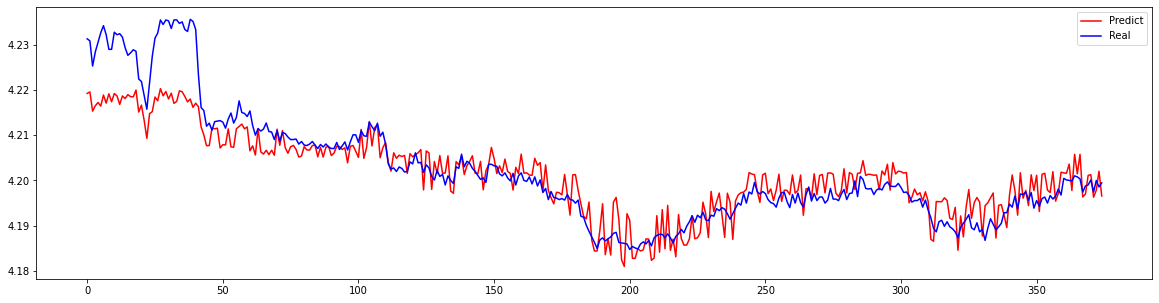

In [143]:
# 선형 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(test_predict, c = 'r', label = 'Predict')
plt.plot(Test_df[Target_columns], c='b', label = 'Real')
plt.legend()

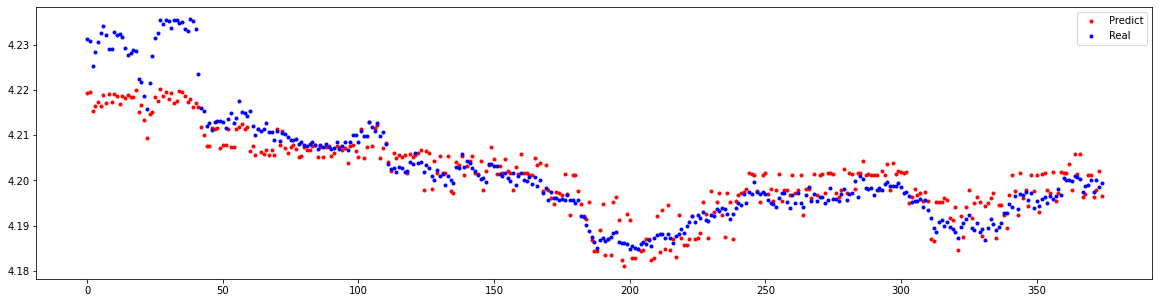

In [144]:
# 분산형 그래프 그리기
plt.figure(figsize=(20,5))
plt.scatter(range(0,len(test_predict)), test_predict, marker = '.', c = 'red', label = 'Predict')
plt.scatter(range(0,len(test_predict)), Test_df[Target_columns], marker = '.', c = 'b', label = 'Real')
plt.legend()